Write a program that would take an intrinsic silicon material, and an intrinsic Gallium Arsenide (GaAs) material. Provide the effective mass of electrons and holes for each material. Also provide the bandgap of each material. Based on those input parameters, draw the E-k diagram of conduction and valence band for each material. You may assume that the E-k diagram of both the conduction and valence band are parabola, and take the valence band maxima as the reference of energy (). The E-k diagram will look like the following:    


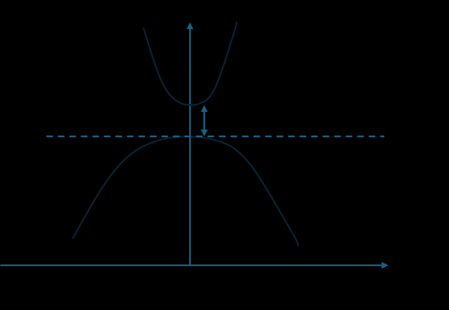

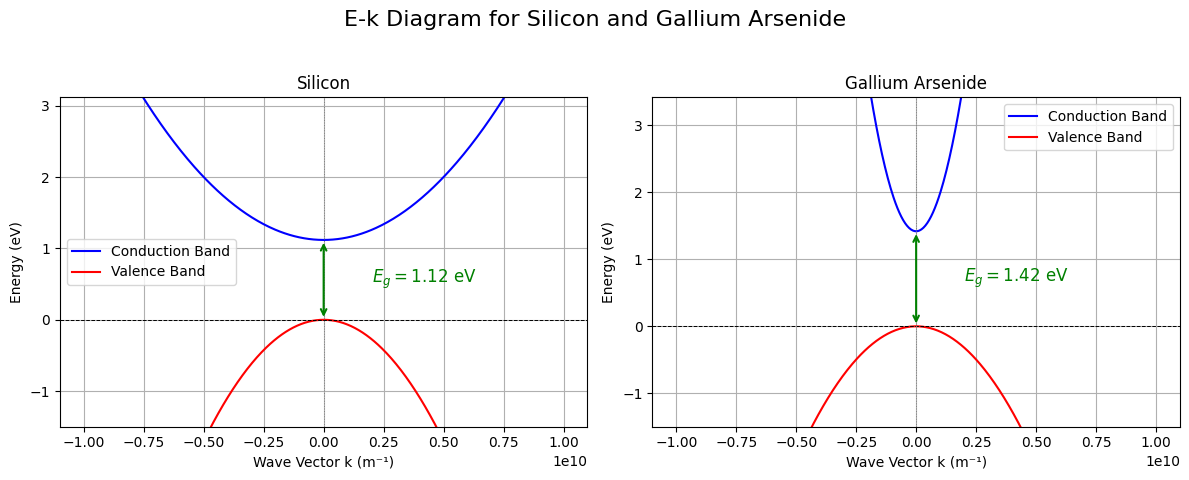

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
hbar = 1.0545718e-34  # Reduced Planck's constant in J·s
q = 1.60218e-19       # Elementary charge in C
m0 = 9.10938356e-31   # Electron rest mass in kg

# Define k range (wave vector)
k = np.linspace(-1e10, 1e10, 500)  # in m^-1

# Materials: Silicon and GaAs
materials = {
    'Silicon': {
        'Eg': 1.12,       # eV
        'me': 1.08 * m0,  # kg
        'mh': 0.56 * m0   # kg
    },
    'Gallium Arsenide': {
        'Eg': 1.42,       # eV
        'me': 0.067 * m0, # kg
        'mh': 0.48 * m0   # kg
    }
}

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('E-k Diagram for Silicon and Gallium Arsenide', fontsize=16)

for ax, (material, props) in zip(axes, materials.items()):
    Eg = props['Eg']       # in eV
    me = props['me']       # in kg
    mh = props['mh']       # in kg

    # Energy calculations
    Ec = Eg + (hbar**2 * k**2) / (2 * me) / q  # Conduction band (parabolic)
    Ev = -(hbar**2 * k**2) / (2 * mh) / q      # Valence band (parabolic)

    # Plot E-k diagram
    ax.plot(k, Ec, label='Conduction Band', color='blue')
    ax.plot(k, Ev, label='Valence Band', color='red')
    ax.axhline(0, color='black', linestyle='--', linewidth=0.7)
    ax.axvline(0, color='gray', linestyle=':', linewidth=0.7)

    # Add Eg arrow and label
    ax.annotate('', xy=(0, Eg), xytext=(0, 0),
                arrowprops=dict(arrowstyle='<->', color='green', lw=1.5))
    ax.text(0.2e10, Eg / 2, fr'$E_g = {Eg:.2f}$ eV', color='green',
            fontsize=12, verticalalignment='center')

    # Axis and title
    ax.set_title(material)
    ax.set_xlabel('Wave Vector k (m⁻¹)')
    ax.set_ylabel('Energy (eV)')
    ax.grid(True)
    ax.legend()
    ax.set_ylim(-1.5, Eg + 2)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
